## Complete Logistic Regression with Ultrasonic Data

Importing all the libraries required

In [5]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import sys
import random
from scipy.optimize import minimize, rosen, rosen_der,fmin_cg

Lag: 28
Coefficients: [ 4.51319672e+00  2.58905294e-01  4.91301165e-01  3.36013141e-03
  3.33834206e-02 -1.78715560e-01 -1.68800560e-01 -8.97285398e-02
 -6.64741503e-02 -1.63578269e-01 -1.18214723e-01 -1.39449575e-02
  1.07204722e-01  1.01944728e-01 -4.22998655e-02 -6.33248267e-02
 -9.31826373e-02 -1.09564360e-01 -4.63166290e-02  4.35577288e-02
  3.56126448e-02  3.34165341e-02  2.26932769e-02 -5.27774719e-02
 -5.90423156e-03  2.41566195e-03 -1.02351698e-02  2.99808372e-02
  1.92479523e-02]
predicted=3.635037, expected=2.000000
predicted=-0.583742, expected=1.000000
predicted=-0.908753, expected=1.000000
predicted=-5.171556, expected=-1.000000
predicted=-5.182560, expected=-2.000000
predicted=-6.481410, expected=0.000000
predicted=-6.086335, expected=1.000000
predicted=-5.237539, expected=4.000000
predicted=-1.439015, expected=3.000000
predicted=3.198391, expected=9.000000
predicted=7.446981, expected=8.000000
predicted=10.094879, expected=19.000000
predicted=12.627263, expected=8.00000

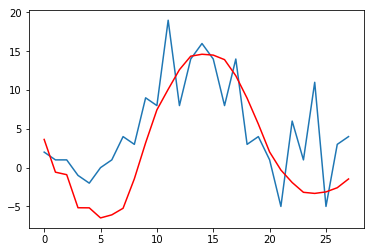

In [7]:
file_name="/home/kushal/Desktop/Simulation/POC/Ultrasonic_dataset_14/mar_22.txt"
indices=np.array([15,16,20,21,22,28,30,31,34,41,42,43,44,45,47,48,50,51,52,53,54,55,61,62,63,64,65,66,71,72,73,74,
                  75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92,93,94,95,96,97,98,99,100,103,104,105,106,107,108,
                  109,110,111,112,113,114,115,116,117,118,119,124,125,126,127,128,129,130,136,137,138,139,
                  140,141,142,145,146,147,148,149,150,162,170,171,172,175,176,207,239,240])
a_scans=np.loadtxt(file_name)
a_scan=a_scans[indices[47]]
a_scan_train=a_scan[1702:3750]
a_scan_test=a_scans[indices[48]]
a_scan_test=a_scan_test[1702:3750]
train,test=np.append(a_scan_train,a_scan_test[0:1024]),a_scan_test[1024:len(a_scan_test)]
# train autoregression
model = AR(train)

model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions[0:28])):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test[0:28], predictions[0:28])
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test[0:28])
pyplot.plot(predictions[0:28], color='red')
pyplot.show()